In [ ]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 

import keras 
from keras.models import Sequential,Model,model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization,AveragePooling2D
from keras.utils import np_utils
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Duygu_tanıma/fer2013.csv')
data.shape

(35887, 3)

In [ ]:
data.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [ ]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
data['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [ ]:
train_data=data[data.Usage=='Training']

In [ ]:
train_data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


Eğitim örneklerinin piksel değerleri bize tablo halinde yan yana veridiği için boşluklardan parse ederek liste haline getirelim

In [ ]:
train_pixels=train_data.pixels.str.split(' ').tolist()
train_pixels=pd.DataFrame(train_pixels,dtype=int)
train_images=train_pixels.values
train_images=train_images.astype(np.float)
print(train_images)
print(train_images.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 74.  81.  87. ... 188. 187. 187.]
 [222. 227. 203. ... 136. 136. 134.]
 [195. 199. 205. ...   6.  15.  38.]]
(28709, 2304)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


Rastgele bir resim gösterelim

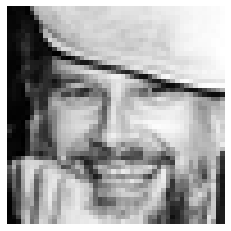

In [ ]:
plt.axis('off')
plt.imshow(train_images[1141].reshape(48,48),cmap='gray')

In [ ]:
print('Farklı yüz ifadelerinin sayısı :',len(data['emotion'].unique()))

Farklı yüz ifadelerinin sayısı : 7


In [ ]:
from sklearn.preprocessing import LabelBinarizer
y_train=train_data['emotion']
lb=LabelBinarizer()
y_train=lb.fit_transform(y_train).astype(np.uint8)
print(y_train[:5])
print(y_train.shape)

[[1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1]]
(28709, 7)


In [ ]:
val_data=data[data.Usage=='PublicTest']

val_pixels=val_data.pixels.str.split(' ').tolist()
val_pixels=pd.DataFrame(val_pixels,dtype=int)
val_images=val_pixels.values
val_images=val_images.astype(np.float)
print(val_images)
print(val_images.shape)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


[[254. 254. 254. ...  42. 129. 180.]
 [156. 184. 198. ... 172. 167. 161.]
 [ 69. 118.  61. ...  88.  87.  90.]
 ...
 [255. 255. 255. ...  48.  50.  46.]
 [ 33.  25.  31. ...   4.   5.   4.]
 [ 61.  63.  59. ... 113. 165. 180.]]
(3589, 2304)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


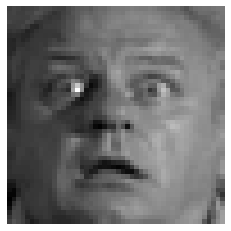

In [ ]:
plt.axis('off')
plt.imshow(val_images[1000].reshape(48,48),cmap='gray')

In [ ]:
y_val=val_data['emotion']
y_val=lb.fit_transform(y_val).astype(np.uint8)
print(y_val[:5])
print(y_val.shape)

[[1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0]]
(3589, 7)


# Data Normalization

In [ ]:
x_train=train_images
x_val=val_images

print('Train :',x_train.shape)
print('Test :',x_val.shape)
"""
x_train = x_train.astype(np.float32)
x_train=x_train/255
x_train=x_train.astype(np.uint8)

x_val = x_val.astype(np.float32)
x_val=x_val/255
x_val=x_val.astype(np.uint8)
"""

x_train=x_train.reshape(-1,48,48,1)
x_val=x_val.reshape(-1,48,48,1)



Train : (28709, 2304)
Test : (3589, 2304)


# **Model Oluşturma**

In [ ]:

model = Sequential()

#1. katman
model.add(Conv2D(64, 3, data_format="channels_last", kernel_initializer="he_normal", input_shape=(48,48,1),activation='swish'))
model.add(BatchNormalization())

#2.katman

model.add(Conv2D(64, 3,activation='swish'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.25)) 

#3. katman
model.add(Conv2D(32, 3,activation='swish'))
model.add(BatchNormalization())


#4. katman
model.add(Conv2D(32, 3,activation='swish'))
model.add(BatchNormalization())

#5. katman
model.add(Conv2D(32, 3,activation='swish'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.25))

#Tam bağlantı katmanı
model.add(Flatten())
model.add(Dense(128,activation='swish'))
model.add(BatchNormalization())
model.add(Dropout(0.6))

# Çıkış katmanı

model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                        

In [ ]:
#En başarılı ağırlıkları kaydet 
checkpointer=ModelCheckpoint('face_model.h5',verbose=1,save_best_only=True)

#shuffle karışık bir şekilde görselleri almak 
hist=model.fit(x_train,y_train,
               epochs=60,
               shuffle=True,
               batch_size=1400,
               validation_data=(x_val,y_val),
               callbacks=[checkpointer],verbose=2)



Epoch 1/60

Epoch 1: val_loss improved from inf to 4.19261, saving model to face_model.h5
21/21 - 29s - loss: 2.5190 - accuracy: 0.2089 - val_loss: 4.1926 - val_accuracy: 0.0769 - 29s/epoch - 1s/step
Epoch 2/60

Epoch 2: val_loss improved from 4.19261 to 2.22383, saving model to face_model.h5
21/21 - 9s - loss: 2.0005 - accuracy: 0.2995 - val_loss: 2.2238 - val_accuracy: 0.1730 - 9s/epoch - 439ms/step
Epoch 3/60

Epoch 3: val_loss improved from 2.22383 to 1.86251, saving model to face_model.h5
21/21 - 9s - loss: 1.8350 - accuracy: 0.3629 - val_loss: 1.8625 - val_accuracy: 0.2605 - 9s/epoch - 438ms/step
Epoch 4/60

Epoch 4: val_loss improved from 1.86251 to 1.78880, saving model to face_model.h5
21/21 - 9s - loss: 1.7143 - accuracy: 0.3896 - val_loss: 1.7888 - val_accuracy: 0.2700 - 9s/epoch - 440ms/step
Epoch 5/60

Epoch 5: val_loss improved from 1.78880 to 1.68369, saving model to face_model.h5
21/21 - 9s - loss: 1.6548 - accuracy: 0.4122 - val_loss: 1.6837 - val_accuracy: 0.3773 - 9s

# **Görselleştirme**

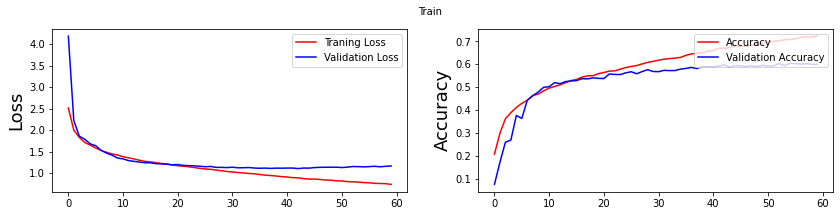

In [ ]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
plt.suptitle('Train',fontsize=10)
plt.ylabel('Loss',fontsize=18)
plt.plot(hist.history['loss'],color='r',label='Traning Loss')
plt.plot(hist.history['val_loss'],color='b',label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy',fontsize=18)
plt.plot(hist.history['accuracy'],color='r',label='Accuracy')
plt.plot(hist.history['val_accuracy'],color='b',label='Validation Accuracy')
plt.legend(loc='upper right')


plt.show()

# **Test Setini Kullanmak**

In [ ]:
test_data=data[data.Usage=='PrivateTest']

test_pixels=test_data.pixels.str.split(' ').tolist()
test_pixels=pd.DataFrame(test_pixels,dtype=int)
test_images=test_pixels.values
test_images=test_images.astype(np.float)
print(test_images)
print(test_images.shape)

y_test=test_data['emotion']
y_test=lb.fit_transform(y_test).astype(np.uint8)
print(y_test[:5])
print(y_test.shape)

x_test=test_images.reshape(-1,48,48,1)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


[[170. 118. 101. ... 159. 133. 131.]
 [  7.   5.   8. ...  72.  57.  52.]
 [232. 240. 241. ...   4.   4.   9.]
 ...
 [ 17.  17.  16. ... 154. 133. 113.]
 [ 30.  28.  28. ...  35.  30.  28.]
 [ 19.  13.  14. ... 189. 199. 201.]]
(3589, 2304)
[[1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0]]
(3589, 7)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
score_test = model.evaluate(x_test,y_test)
print("Test Doğruluğu: %",score_test[1]*100)

113/113 [==============================] - 1s 7ms/step - loss: 1.0762 - accuracy: 0.6127
Test Doğruluğu: % 61.27054691314697
